In [1]:
## Clustering example 2 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as s 
%matplotlib inline 

In [5]:
df = pd.read_csv('well_defined_clusters.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


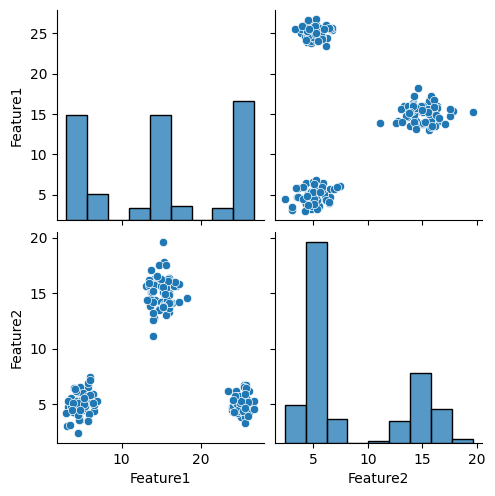

In [3]:
s.pairplot(df)

In [4]:
df.corr()

,Feature1,Feature2
Feature1,1.000000,0.008159
Feature2,0.008159,1.000000


In [9]:
df.head()

,Feature1,Feature2
0,5.496714,4.927990
1,4.861736,6.003533
2,5.647689,5.361636
3,6.523030,4.354880
4,4.765847,5.361396


<Axes: xlabel='Feature1', ylabel='Feature2'>

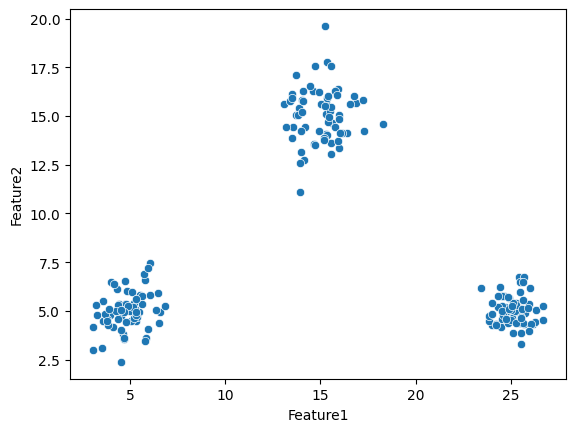

In [7]:
s.scatterplot(x='Feature1',y='Feature2',data = df)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(df)

In [12]:
## ELBOW METHOD 
from sklearn.cluster import KMeans
wcss = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
wcss

[201.0951732107904,
 11.667891934798856,
 8.39062655850671,
 6.867805371844868,
 6.258994514075621,
 5.72030729648503,
 5.062804885115465,
 4.286406851120174,
 3.934442707108513,
 3.4034891206922344,
 3.1541000596674014,
 2.9515539301563427,
 2.8061049314050415,
 2.41319646783481,
 2.2997590553358713,
 2.159757984171799,
 1.9450303480715285,
 1.8425119620844252]

Text(0.5, 1.0, 'Elbow Method')

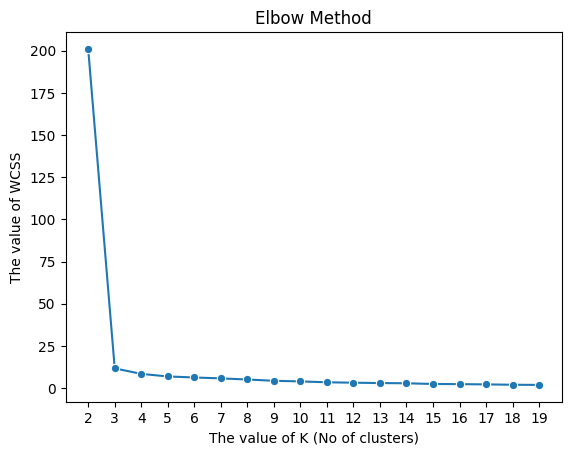

In [18]:
s.lineplot(x = range(2,20),y=wcss,marker='o')
plt.xticks(range(2,20))
plt.xlabel("The value of K (No of clusters)")
plt.ylabel("The value of WCSS")
plt.title("Elbow Method")

In [22]:
from kneed import KneeLocator
k = KneeLocator(range(2,20),wcss,curve='convex',direction='decreasing')
kx = k.elbow
print(f"The value of k as per knee Locator is: {kx}")

The value of k as per knee Locator is: 3


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sill = []
for k in range(2, 20):
    kmeans_2 = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_2.fit(data)
    labels = kmeans_2.labels_
    score = silhouette_score(data, labels)
    sill.append(score)

print(sill)


[0.571278286457058, 0.8764310475775563, 0.7390319163898781, 0.5802395869822883, 0.5755849771898986, 0.570894911667015, 0.5594920682378162, 0.5407566891625436, 0.36734105367152436, 0.3590897206071181, 0.3545305160035563, 0.3622584779339981, 0.3447031027217385, 0.34006915972981494, 0.33530752218657334, 0.34021712295991097, 0.34737343373223384, 0.3581501857402277]


([<matplotlib.axis.XTick at 0x72942fbff920>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

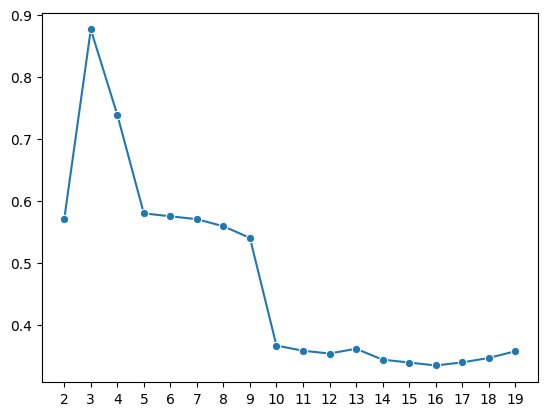

In [27]:
s.lineplot(x = range(2,20),y=sill,marker="o")
plt.xticks(range(2,20))

In [28]:
Kmeans = KMeans(n_clusters=3,init='k-means++')
Kmeans.fit(data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [29]:
labels = Kmeans.labels_
print(labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [30]:
centers = Kmeans.cluster_centers_
print(centers)


[[-1.2203545  -0.69243809]
 [ 1.21444728 -0.68814689]
 [ 0.00590723  1.38058499]]


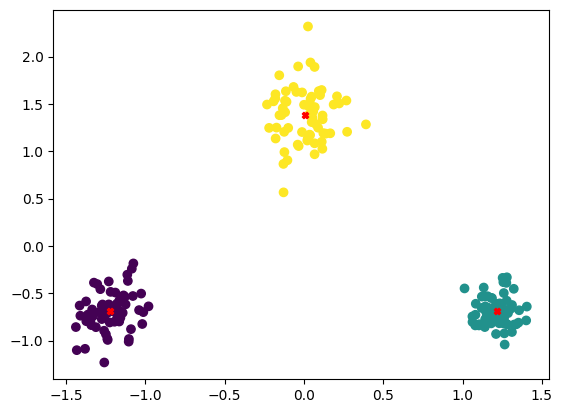

In [32]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=20)
plt.show()
